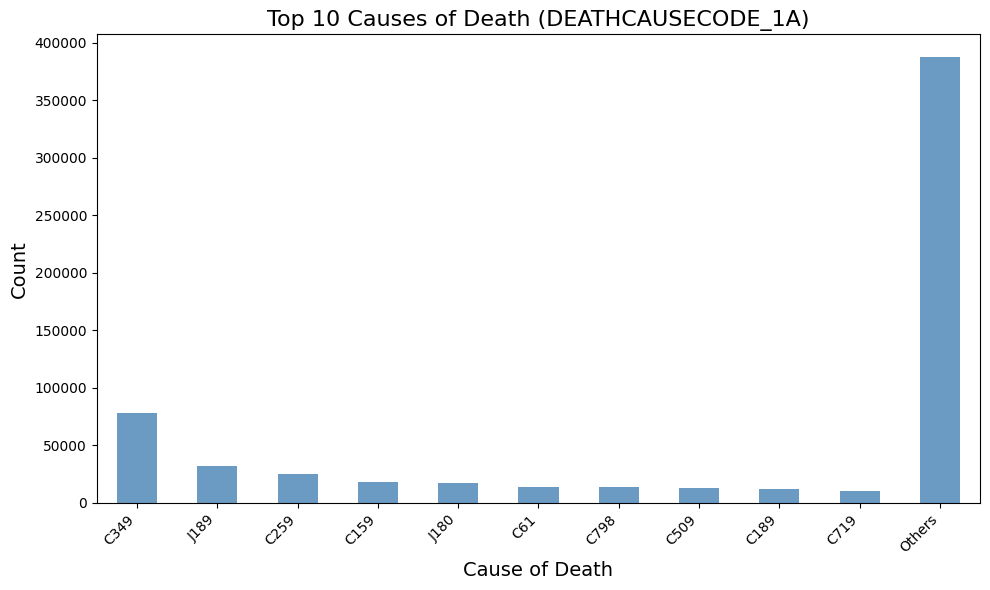

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset again to ensure up-to-date columns
patient_df = pd.read_csv("C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_patient.csv", low_memory=False)

# Function to create a bar chart for DEATHCAUSECODE_1A (or others) with customization
def plot_top_death_causes(df, column_name, top_n=10):
    """
    Plots a bar chart of the top causes of death from a specified column,
    grouping less frequent causes as 'Others'.
    """
    if column_name in df.columns:
        # Count occurrences of each cause
        cause_counts = df[column_name].value_counts()

        # Group less frequent causes as "Others"
        top_causes = cause_counts.head(top_n)
        other_causes_count = cause_counts.iloc[top_n:].sum()
        top_causes["Others"] = other_causes_count

        # Plot the bar chart
        plt.figure(figsize=(10, 6))
        top_causes.plot(kind='bar', color='steelblue', alpha=0.8)
        plt.title(f"Top {top_n} Causes of Death ({column_name})", fontsize=16)
        plt.xlabel("Cause of Death", fontsize=14)
        plt.ylabel("Count", fontsize=14)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{column_name}' not found in the dataset.")

# Example usage: Adjust the top_n to display the desired number of top causes
plot_top_death_causes(patient_df, column_name="DEATHCAUSECODE_1A", top_n=10)


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, interact



# Function to plot top death causes
def plot_top_death_causes(range_label):
    column_name = "DEATHCAUSECODE_1A"
    ranges = {"Top 5": 5, "Top 10": 10, "Top 20": 20, "Top 50": 50}
    top_n = ranges[range_label]
    if column_name in patient_df.columns:
        cause_counts = patient_df[column_name].value_counts()
        top_causes = cause_counts.head(top_n)
        top_causes["Others"] = cause_counts.iloc[top_n:].sum()
        plt.figure(figsize=(10, 6))
        top_causes.plot(kind='bar', color='steelblue', alpha=0.8)
        plt.title(f"Top {top_n} Causes of Death", fontsize=16)
        plt.xlabel("Cause of Death", fontsize=14)
        plt.ylabel("Count", fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Create dropdown with predefined ranges
dropdown = Dropdown(options=["Top 5", "Top 10", "Top 20", "Top 50"], value="Top 10", description="Select Range:")
interact(plot_top_death_causes, range_label=dropdown)


interactive(children=(Dropdown(description='Select Range:', index=1, options=('Top 5', 'Top 10', 'Top 20', 'To…

<function __main__.plot_top_death_causes(range_label)>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

# Function to process data in chunks
def load_and_process_data(file_path, chunk_size=100000):
    """
    Loads data in chunks, processes it to keep only relevant columns, and concatenates all chunks.
    """
    chunks = []
    for chunk in pd.read_csv(
        file_path, 
        usecols=['VITALSTATUSDATE', 'GENDER'],  # Required columns
        dtype={'GENDER': 'int8'},  # Optimize data types
        chunksize=chunk_size,
        low_memory=True
    ):
        # Convert VITALSTATUSDATE to datetime and extract year
        chunk['VITALSTATUSDATE'] = pd.to_datetime(chunk['VITALSTATUSDATE'], errors='coerce').dt.year
        chunk['VITALSTATUSDATE'] = chunk['VITALSTATUSDATE'].astype('Int64')  # Nullable integers
        chunks.append(chunk.dropna(subset=['VITALSTATUSDATE']))  # Drop rows with missing dates

    # Combine all chunks into a single DataFrame
    return pd.concat(chunks, ignore_index=True)

# Load and process the dataset
file_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_patient.csv"
patient_df = load_and_process_data(file_path)

# Map gender for better readability
gender_mapping = {1: 'Male', 2: 'Female', 9: 'Unknown'}
patient_df['GENDER_mapped'] = patient_df['GENDER'].map(gender_mapping)

# Define function for plotting
def plot_timeline(gender_filter="All"):
    """
    Plots a timeline chart of deaths grouped by year.
    """
    # Filter the dataset based on gender
    filtered_df = patient_df.copy()
    if gender_filter != "All":
        filtered_df = filtered_df[filtered_df['GENDER_mapped'] == gender_filter]

    # Group data by year
    deaths_by_year = filtered_df['VITALSTATUSDATE'].value_counts().sort_index()

    # Plot the timeline chart
    plt.figure(figsize=(12, 6))
    deaths_by_year.plot(kind='bar', color='steelblue', alpha=0.8)
    plt.title(f"Deaths Timeline by Year (Gender: {gender_filter})", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Number of Deaths", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Interactive Filters for Gender
gender_options = ["All"] + patient_df['GENDER_mapped'].dropna().unique().tolist()

# Use interact for dynamic filtering
interact(plot_timeline, gender_filter=gender_options)


interactive(children=(Dropdown(description='gender_filter', options=('All', 'Male', 'Female', 'Unknown'), valu…

<function __main__.plot_timeline(gender_filter='All')>